In [31]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
def rename(kind, hold_position, name):
    folder_name = "../安部関口分類フロー検証/pattern2NewTest"
    if kind == "test":
        file_path = folder_name + "/" + kind + "_" + name + "分類_pattern2.npy"
        return file_path
    
    if name == "a安部":
        file_path = folder_name + "/" + name + "分類_" + kind + "_" + hold_position + "_pattern2.npy"
#     elif name == "熊野" and kind == "validation":
#         file_path = "pattern" + pattern + "/val_" + hold_position + "_" + name + "分類.npy"
    else:
        file_path = folder_name + "/" + kind + "_" + hold_position + "_" + name + "分類_pattern2.npy"
    return file_path

In [5]:
def logisticTest_pattern2(kind, names):
    file_path = rename(kind, "", names[0])
    x = np.load(file_path)
    print(x.shape)
    for name in names[1:]:
        file_path = rename(kind, "", name)
        x = np.concatenate([x, np.load(file_path)], axis=1)
        print(x.shape)
    return x

In [6]:
names = ["安部", "安部2", "関口", "熊野", "横山", "横山2"]

x_test = logisticTest_pattern2("test", names)
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape

(57573, 8)
(57573, 16)
(57573, 24)
(57573, 32)
(57573, 40)
(57573, 48)


(57573, 48)

In [7]:
labels = []

for i in range(6):
    labels.append(np.argmax(x_test[:, i*8:(i+1)*8], axis=1) + 1)
len(labels)

6

In [11]:
from tqdm import tqdm
def label_create(x, file_name):
    result = []
    for i in tqdm(range(len(x))):
        result.append([x[i]] * 500)
    result = np.array(result).reshape([-1, 500]).astype(np.int32)
    np.savetxt("data/{}_predictions.txt".format(file_name), result, fmt='%i')

In [12]:
for i in range(len(labels)):
    label_create(labels[i], names[i] + "_")

100%|████████████████████████████████████████████████████████████████████████| 57573/57573 [00:00<00:00, 148395.78it/s]


In [17]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# ラベルの比較

In [32]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [20]:
dsml = np.loadtxt("data/DSML-TDU_predictions.txt", dtype=np.int32)[:, 0]
bsa = np.loadtxt("data/TDU_BSA_predictions.txt", dtype=np.int32)[:, 0]
abe1 = np.loadtxt("data/安部1_predictions.txt", dtype=np.int32)[:, 0]
abe2 = np.loadtxt("data/安部2_predictions.txt", dtype=np.int32)[:, 0]
yokoyama1 = np.loadtxt("data/横山1_predictions.txt", dtype=np.int32)[:, 0]
yokoyama2 = np.loadtxt("data/横山2_predictions.txt", dtype=np.int32)[:, 0]
kumano = np.loadtxt("data/熊野_predictions.txt", dtype=np.int32)[:, 0]
sekiguchi = np.loadtxt("data/関口_predictions.txt", dtype=np.int32)[:, 0]

dsml.shape

(57573,)

In [45]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=24):
    cm = (confusion_matrix(test_y,pred_y))
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
#     ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.1f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j] * 100, fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

Text(0.5, 1, 'BSA Accuracy：55.9')

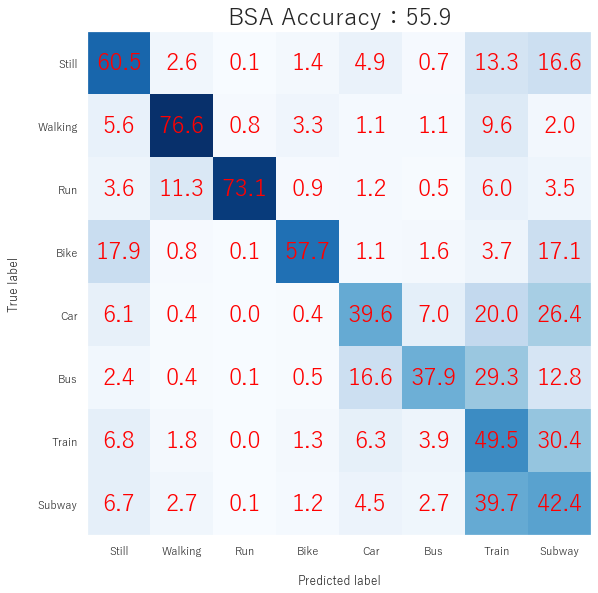

In [47]:
moving_states = ['Still', 'Walking', 'Run', 'Bike', 'Car', 'Bus', 'Train', 'Subway']

plot_confusion_matrix(dsml, bsa, class_names=moving_states, normalize=True)
accuracy = accuracy_score(dsml, bsa)
plt.grid(False)
plt.title("BSA Accuracy：{0:.1f}".format(accuracy*100), fontsize=24)

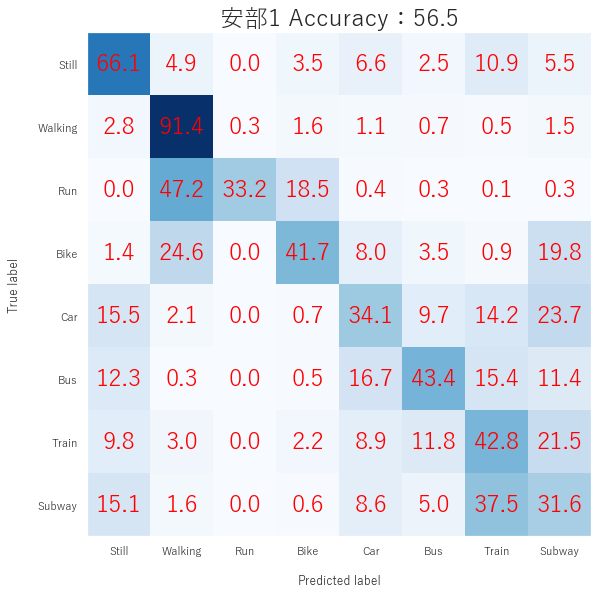

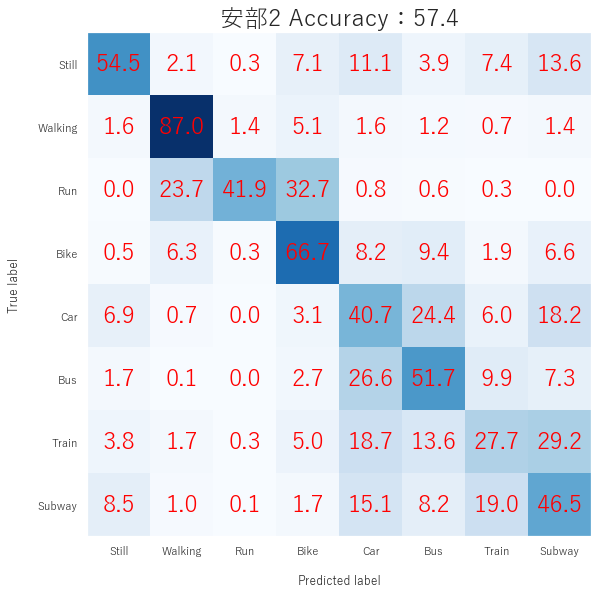

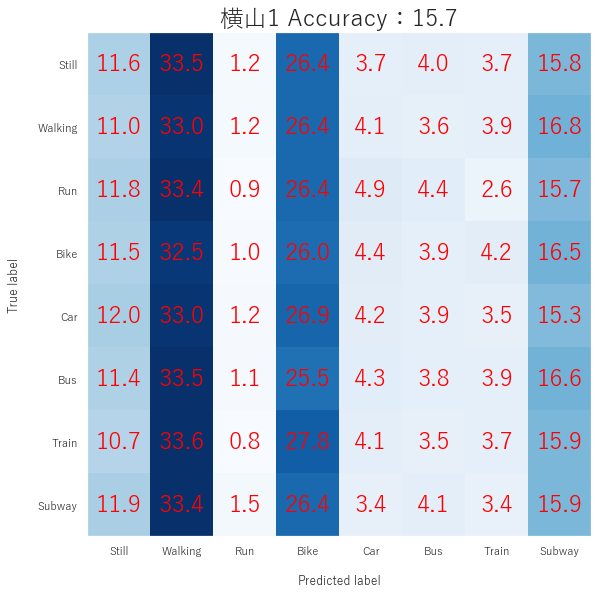

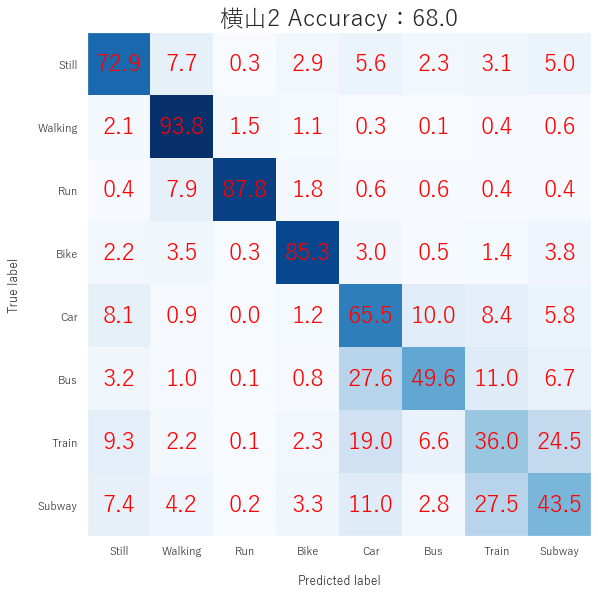

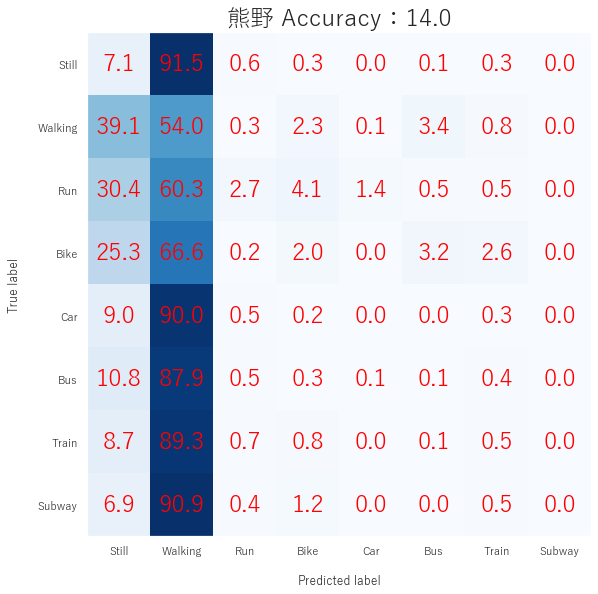

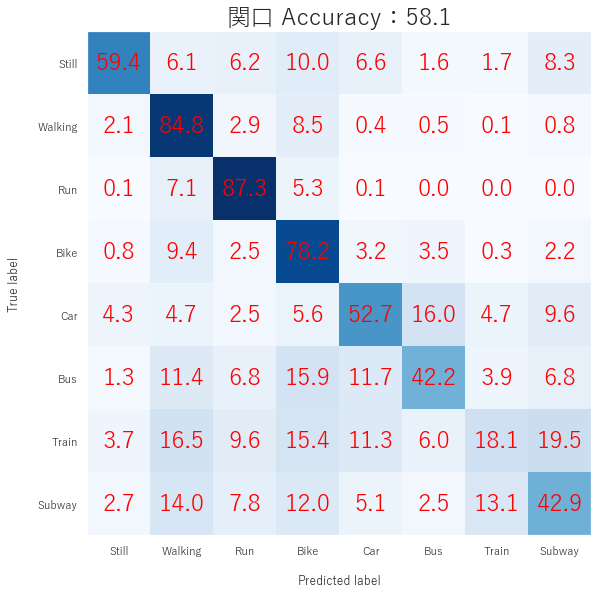

In [46]:
labels = [abe1, abe2, yokoyama1, yokoyama2, kumano, sekiguchi]
names = ["安部1", "安部2", "横山1", "横山2", "熊野", "関口"]

for i in range(len(labels)):
    plot_confusion_matrix(dsml, labels[i], class_names=moving_states, normalize=True)
    accuracy = accuracy_score(dsml, labels[i])
    plt.grid(False)
    plt.title("{0} Accuracy：{1:.1f}".format(names[i], accuracy*100), fontsize=24)

In [50]:
index = np.array(list(range(2931, 4673+1))
pd.DataFrame(np.concatenate([index, label], columns=['id', 'label']))

<module 'pandas' from 'C:\\Users\\Owner\\Anaconda3\\envs\\GPU\\lib\\site-packages\\pandas\\__init__.py'>